In [21]:
import lightgbm

In [22]:
import pandas as pd

train_df = pd.read_csv("./data/preprocessed_train.csv")
test_df = pd.read_csv("./data/preprocessed_test.csv")

In [23]:
test_df

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupId,...,spend_money,HP_Earth,HP_Europa,HP_Mars,D_55 Cancri e,D_PSO J318.5-22,D_TRAPPIST-1e,Cabin_deck_F,Cabin_deck_G,Cabin_deck_Other
0,0013_01,1,-0.123167,0,-0.344206,-0.287668,-0.296182,-0.275783,-0.261991,-1.721028,...,-0.540420,1,0,0,0,0,1,0,1,0
1,0018_01,0,-0.679237,0,-0.344206,-0.281931,-0.296182,2.247594,-0.261991,-1.719166,...,0.504388,1,0,0,0,0,1,1,0,0
2,0019_01,1,0.154868,0,-0.344206,-0.287668,-0.296182,-0.275783,-0.261991,-1.718794,...,-0.540420,0,1,0,1,0,0,0,0,1
3,0021_01,0,0.641428,0,-0.344206,3.952454,-0.296182,-0.113994,0.238566,-1.718049,...,2.196298,0,1,0,0,0,1,0,0,1
4,0023_01,0,-0.609728,0,-0.328764,-0.287668,0.779113,-0.275783,-0.261991,-1.717304,...,-0.302461,1,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,1,0.363394,0,-0.344206,-0.287668,-0.296182,-0.275783,-0.261991,1.724127,...,-0.540420,1,0,0,0,0,1,0,1,0
4273,9269_01,0,0.919463,0,-0.344206,0.252228,-0.267395,-0.266845,-0.138777,1.725244,...,-0.164850,1,0,0,0,0,1,0,1,0
4274,9271_01,1,NaN,0,-0.344206,-0.287668,-0.296182,-0.275783,-0.261991,1.725989,...,-0.540420,0,0,1,1,0,0,0,0,1
4275,9273_01,0,NaN,0,-0.344206,1.420620,-0.296182,-0.275783,0.185516,1.726734,...,0.641261,0,1,0,0,0,1,0,0,1


In [24]:
x_train = train_df.drop(["PassengerId", "Transported"],axis =1)
y_train = train_df["Transported"]

In [25]:
x_test = test_df.drop(["PassengerId"],axis =1)

In [26]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CryoSleep         8693 non-null   int64  
 1   Age               8514 non-null   float64
 2   VIP               8693 non-null   int64  
 3   RoomService       8512 non-null   float64
 4   FoodCourt         8693 non-null   float64
 5   ShoppingMall      8485 non-null   float64
 6   Spa               8693 non-null   float64
 7   VRDeck            8693 non-null   float64
 8   GroupId           8693 non-null   float64
 9   GroupSize         8693 non-null   float64
 10  is_alone          8693 non-null   int64  
 11  Cabin_side        8693 non-null   int64  
 12  Cabin_num         8693 non-null   float64
 13  spend_money       8693 non-null   float64
 14  HP_Earth          8693 non-null   int64  
 15  HP_Europa         8693 non-null   int64  
 16  HP_Mars           8693 non-null   int64  


In [27]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CryoSleep         4277 non-null   int64  
 1   Age               4186 non-null   float64
 2   VIP               4277 non-null   int64  
 3   RoomService       4195 non-null   float64
 4   FoodCourt         4277 non-null   float64
 5   ShoppingMall      4179 non-null   float64
 6   Spa               4277 non-null   float64
 7   VRDeck            4277 non-null   float64
 8   GroupId           4277 non-null   float64
 9   GroupSize         4277 non-null   float64
 10  is_alone          4277 non-null   int64  
 11  Cabin_side        4277 non-null   int64  
 12  Cabin_num         4277 non-null   float64
 13  spend_money       4277 non-null   float64
 14  HP_Earth          4277 non-null   int64  
 15  HP_Europa         4277 non-null   int64  
 16  HP_Mars           4277 non-null   int64  


In [28]:
from sklearn.model_selection import StratifiedKFold

stratified_kf = StratifiedKFold(
    n_splits= 5,
    shuffle = True,
    random_state =1234
)

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[10, 30, 50],
    "verbose" :[-1,0,1,2]
}

In [30]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2155
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495


LGBMClassifier()

In [31]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=stratified_kf,
    scoring="accuracy"
)
grid_search.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2154
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] St

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=LGBMClassifier(),
             param_grid={'n_estimators': [10, 30, 50],
                         'verbose': [-1, 0, 1, 2]},
             scoring='accuracy')

In [32]:
grid_search.best_params_, grid_search.best_score_

({'n_estimators': 50, 'verbose': -1}, 0.8061648726071026)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

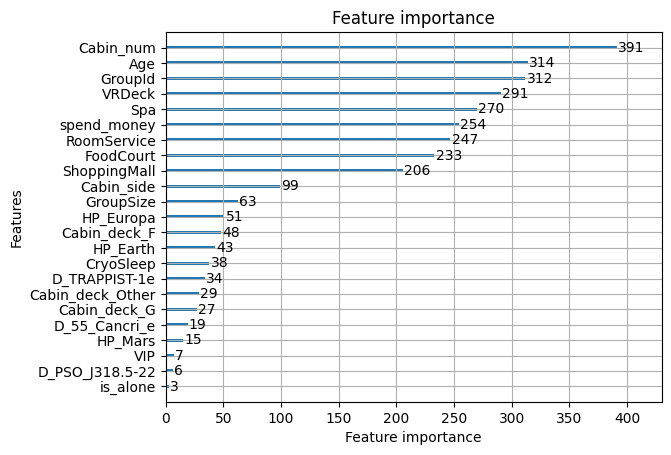

In [33]:
from lightgbm import plot_importance

plot_importance(model)

In [34]:
import lightgbm as lgb

model = lgb.LGBMClassifier(verbose = -1, n_estimators = 50)
model.fit(x_train, y_train)

LGBMClassifier(n_estimators=50, verbose=-1)

In [35]:
y_test = model.predict(x_test)

In [36]:
test_df["Transported"] = y_test

In [37]:
test_df[["PassengerId","Transported"]].to_csv("./data/submission_lgb.csv", index=False)

0.80196가 나옴

In [38]:
train_df = train_df.drop(["D_PSO J318.5-22","VIP","is_alone"],axis=1)
test_df = test_df.drop(["D_PSO J318.5-22","VIP","is_alone"],axis=1)

In [39]:
x_train = train_df.drop(["PassengerId", "Transported"],axis =1)
y_train = train_df["Transported"]

In [40]:
x_test = test_df.drop(["PassengerId","Transported"],axis =1)

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[10, 30, 50],
    "verbose" :[-1,0,1,2]
}

In [42]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2149
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495


LGBMClassifier()

In [43]:
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=stratified_kf,
    scoring="accuracy"
)
grid_search.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3502, number of negative: 3452
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2148
[LightGBM] [Info] Number of data points in the train set: 6954, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503595 -> initscore=0.014380
[LightGBM] [Info] St

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1234, shuffle=True),
             estimator=LGBMClassifier(),
             param_grid={'n_estimators': [10, 30, 50],
                         'verbose': [-1, 0, 1, 2]},
             scoring='accuracy')

In [44]:
grid_search.best_params_, grid_search.best_score_

({'n_estimators': 50, 'verbose': -1}, 0.8065106263867374)

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

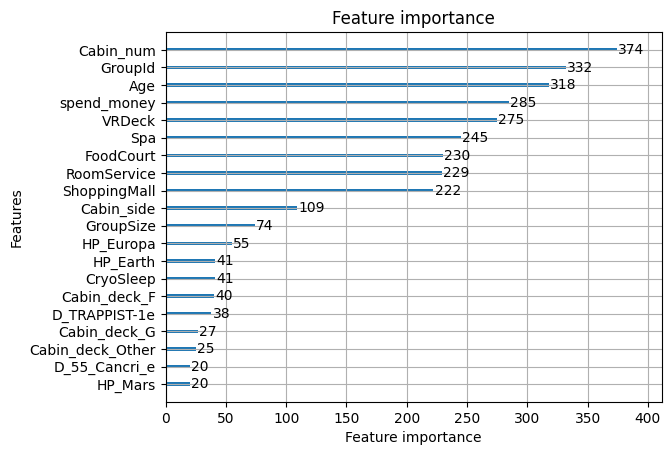

In [45]:
from lightgbm import plot_importance

plot_importance(model)

In [46]:
import lightgbm as lgb

model = lgb.LGBMClassifier(verbose = -1, n_estimators = 50)
model.fit(x_train, y_train)

LGBMClassifier(n_estimators=50, verbose=-1)

In [47]:
y_test = model.predict(x_test)

In [48]:
test_df["Transported"] = y_test

In [49]:
test_df[["PassengerId","Transported"]].to_csv("./data/submission_lgb1.csv", index=False)

In [50]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       4277 non-null   object 
 1   CryoSleep         4277 non-null   int64  
 2   Age               4186 non-null   float64
 3   RoomService       4195 non-null   float64
 4   FoodCourt         4277 non-null   float64
 5   ShoppingMall      4179 non-null   float64
 6   Spa               4277 non-null   float64
 7   VRDeck            4277 non-null   float64
 8   GroupId           4277 non-null   float64
 9   GroupSize         4277 non-null   float64
 10  Cabin_side        4277 non-null   int64  
 11  Cabin_num         4277 non-null   float64
 12  spend_money       4277 non-null   float64
 13  HP_Earth          4277 non-null   int64  
 14  HP_Europa         4277 non-null   int64  
 15  HP_Mars           4277 non-null   int64  
 16  D_55 Cancri e     4277 non-null   int64  


#### 0.80289가 나옴

In [51]:
import lightgbm as lgb

model = lgb.LGBMClassifier()
model.fit(x_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4378, number of negative: 4315
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000821 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2149
[LightGBM] [Info] Number of data points in the train set: 8693, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503624 -> initscore=0.014495
[LightGBM] [Info] Start training from score 0.014495


LGBMClassifier()

In [52]:
y_test = model.predict(x_test)

In [53]:
test_df["Transported"] = y_test

In [55]:
test_df[["PassengerId","Transported"]].to_csv("./data/submission_lgb2.csv", index=False)